# SEMANA 1: Espacio vectorial, Subespacio vectorial, Independecia lineal, Base, Dimensión 
<h1 align="center">(LABORATORIO CALIFICADO)</h1>

## ALUMNOS:
- Escriba Flores, Daniel Agustin
- Palma Gongora, Yllari Fiorella
---

In [1]:
#Importamos las Librerias necesarias para el trabajo

# Tratamiento de datos
# =====================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ===============================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Gráficos
# ==============================
import matplotlib.pyplot as plt

# Configuración warnings
# ================================
import warnings
warnings.filterwarnings('ignore')


## PARTE A : 

In [2]:
#Leemos la base de datos

data = pd.read_csv('comprar_alquilar.csv')


In [3]:
#Verificamos que no cuente con valores nulos
data.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64

In [4]:
#creamos las variables gastos y financiar
data['gastos'] = data['gastos_comunes'] + data['gastos_otros']+data['pago_coche']
data['financiar'] =  data['vivienda'] - data['ahorros']
data

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,1000,0,600,50000,400000,0,2,2,1,1600,350000
1,6745,944,123,429,43240,636897,1,3,6,0,1496,593657
2,6455,1033,98,795,57463,321779,2,1,8,1,1926,264316
3,7098,1278,15,254,54506,660933,0,0,3,0,1547,606427
4,6167,863,223,520,41512,348932,0,0,3,1,1606,307420
...,...,...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0,1530,352397
198,3961,1030,270,475,21880,280421,2,3,8,0,1775,258541
199,3184,955,276,684,35565,388025,1,3,8,0,1915,352460
200,3334,867,369,652,19985,376892,1,2,5,0,1888,356907


In [5]:
#Eliminamos las 3 variables pedidas

data = data.drop(['gastos_comunes','gastos_otros','pago_coche'],axis=1)
data

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
...,...,...,...,...,...,...,...,...,...
197,3831,10723,363120,0,0,2,0,1530,352397
198,3961,21880,280421,2,3,8,0,1775,258541
199,3184,35565,388025,1,3,8,0,1915,352460
200,3334,19985,376892,1,2,5,0,1888,356907


## PARTE B

In [6]:
#Seleccionamos las variables a analizar
data1 = data[['ingresos','ahorros','vivienda','gastos','financiar']]
data1

,ingresos,ahorros,vivienda,gastos,financiar
0,6000,50000,400000,1600,350000
1,6745,43240,636897,1496,593657
2,6455,57463,321779,1926,264316
3,7098,54506,660933,1547,606427
4,6167,41512,348932,1606,307420
...,...,...,...,...,...
197,3831,10723,363120,1530,352397
198,3961,21880,280421,1775,258541
199,3184,35565,388025,1915,352460
200,3334,19985,376892,1888,356907


In [7]:
# Entrenando y escalando los datos
pca_pipe = make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(data1)
modelo_pca = pca_pipe.named_steps['pca']

In [8]:
# convirtiendo el array a dataframe
pd.DataFrame(data = modelo_pca.components_,columns = data1.columns,index = ['CP1','CP2','CP3','CP4','CP5'])

,ingresos,ahorros,vivienda,gastos,financiar
CP1,4.809684e-01,0.454024,0.529774,1.531049e-01,0.508359
CP2,2.656730e-01,-0.068416,-0.223026,9.064812e-01,-0.230843
CP3,3.730215e-01,0.653946,-0.361315,-2.708149e-01,-0.478875
CP4,7.476244e-01,-0.594056,-0.081290,-2.854996e-01,-0.006080
CP5,3.705110e-16,-0.092917,0.729686,-1.734723e-16,-0.677440


Porcentaje de varianza explicada acumulada
[0.61240781 0.82200126 0.95528763 1.         1.        ]


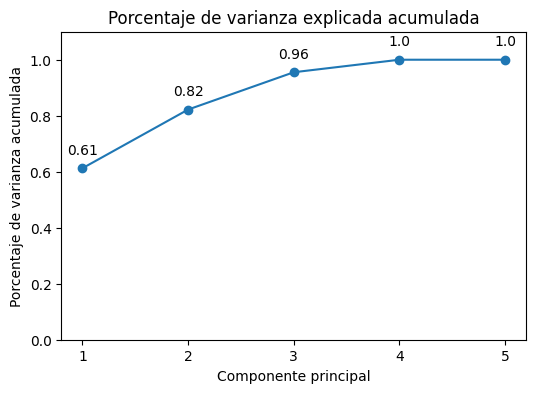

In [9]:
# Porcentaje de varianza explicada acumulada
por_var_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(por_var_acum)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
ax.plot(np.arange(len(data1.columns)) + 1,por_var_acum, marker='o')

for x, y in zip(np.arange(len(data1.columns)) + 1, por_var_acum):
    label = round(y,2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
    
ax.set_ylim(0,1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza acumulada');

Tomamos 3 componentes pues muestra un porcentaje de 96%

## PARTE C

In [10]:
# Realizamos el PCA Con los 3 componentes 

pca_pipe_final = make_pipeline(StandardScaler(),PCA(n_components = 3))
pca_pipe_final.fit(data1)
modelo_pca_final = pca_pipe_final.named_steps['pca']


In [11]:
# convirtiendo el array a dataframe
data2 = pd.DataFrame(data = modelo_pca_final.components_,columns = data1.columns,index = ['CP1','CP2','CP3'])
data2

,ingresos,ahorros,vivienda,gastos,financiar
CP1,0.480968,0.454024,0.529774,0.153105,0.508359
CP2,0.265673,-0.068416,-0.223026,0.906481,-0.230843
CP3,0.373021,0.653946,-0.361315,-0.270815,-0.478875


In [12]:
#Obtenemos la combinacion  para cada componente en funcion de las variables

n=len(data2)
for i in range(n):
    print("CP{:.0f} = {:.6f}(ingresos) + {:.6f}(ahorros) + {:.6f}(vivienda)+ {:.6f}(gastos) + {:.6f}(financiar)".
         format(i+1,data2['ingresos'][i],data2['ahorros'][i],data2['vivienda'][i],data2['gastos'][i],data2['financiar'][i]))

CP1 = 0.480968(ingresos) + 0.454024(ahorros) + 0.529774(vivienda)+ 0.153105(gastos) + 0.508359(financiar)
CP2 = 0.265673(ingresos) + -0.068416(ahorros) + -0.223026(vivienda)+ 0.906481(gastos) + -0.230843(financiar)
CP3 = 0.373021(ingresos) + 0.653946(ahorros) + -0.361315(vivienda)+ -0.270815(gastos) + -0.478875(financiar)


In [13]:
# Finalmente, para actualizar los valores de las componentes principales extraemos los valores de la data con el método ‘values’ y le aplicamos el método ‘transform’ a nuestro modelo PCA, todo esto almacenado dentro de un data frame.
componentes_principales = pd.DataFrame(data = modelo_pca_final.transform(data1.values),columns=['CP1','CP2','CP3'])
componentes_principales

,CP1,CP2,CP3
0,415667.530576,-170381.718668,-277629.919090
1,662308.006563,-278896.190348,-484020.071651
2,334326.920556,-133251.075558,-203373.784666
3,686826.041473,-287835.465676,-491334.644298
4,363194.551824,-148532.425636,-244277.836221
...,...,...,...
197,378461.336161,-160662.371780,-291927.648611
198,292102.533391,-121059.069655,-209823.803238
199,402714.025752,-167753.863454,-285056.649172
200,392071.033607,-165216.174604,-293288.897706
